Name : Tsholofelo Matabane
Created : 30 November 2021

Assignment : GOT Characters Dataset

The dataset is based on the Game of Thrones charaters with the aim to 
determine if whether the character isAlive or not based on the the following 
explainatory value i.e isMale, Popularity, House and appering on a books



In [61]:
#importing library packages
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
import numpy             as np
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots
import gender_guesser.detector as gender # guess gender based on names
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm

#setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#specifying the file 
file = "./GOT_character_predictions.xlsx"

# reading the file into Python through pandas
GOT = pd.read_excel(io = file)

#displaying the first 10 rows of the dataset
GOT.head(n=10)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
5,6,Tommen Baratheon,NaN,NaN,NaN,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,1.000000,1
6,7,Valarr Targaryen,Hand of the King,Valyrian,183.0,NaN,NaN,NaN,House Targaryen,Kiera of Tyrosh,0,0,0,0,0,NaN,NaN,NaN,1.0,1,1,26.0,0,0.431438,0
7,8,Viserys I Targaryen,NaN,NaN,NaN,Alyssa Targaryen,Baelon Targaryen,Rhaenyra Targaryen,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,0.678930,0
8,9,Wilbert,Ser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.006689,0
9,10,Wilbert Osgrey,Ser,NaN,NaN,NaN,NaN,NaN,House Osgrey,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.020067,1


In [62]:
#checking the the information of the dataset
GOT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1946 non-null   int64  
 1   name                        1946 non-null   object 
 2   title                       938 non-null    object 
 3   culture                     677 non-null    object 
 4   dateOfBirth                 433 non-null    float64
 5   mother                      21 non-null     object 
 6   father                      26 non-null     object 
 7   heir                        23 non-null     object 
 8   house                       1519 non-null   object 
 9   spouse                      276 non-null    object 
 10  book1_A_Game_Of_Thrones     1946 non-null   int64  
 11  book2_A_Clash_Of_Kings      1946 non-null   int64  
 12  book3_A_Storm_Of_Swords     1946 non-null   int64  
 13  book4_A_Feast_For_Crows     1946 

In [63]:
GOT.describe().round(decimals=2)

,S.No,dateOfBirth,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
count,1946.00,433.00,1946.0,1946.00,1946.00,1946.00,1946.00,21.00,26.00,23.00,276.00,1946.00,1946.00,433.00,1946.00,1946.00,1946.00
mean,973.50,1577.36,0.2,0.37,0.48,0.59,0.40,0.71,0.19,0.65,0.78,0.14,0.46,-1293.56,0.31,0.09,0.75
std,561.91,19565.41,0.4,0.48,0.50,0.49,0.49,0.46,0.40,0.49,0.42,0.35,0.50,19564.34,1.38,0.16,0.44
min,1.00,-28.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-298001.00,0.00,0.00,0.00
25%,487.25,240.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,18.00,0.00,0.01,0.00
50%,973.50,268.00,0.0,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,27.00,0.00,0.03,1.00
75%,1459.75,285.00,0.0,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,1.00,50.00,0.00,0.09,1.00
max,1946.00,298299.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,100.00,15.00,1.00,1.00


In [64]:
#checking which columns has missing values 
print(GOT.isnull().sum(axis = 0))

S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
dtype: int64


In [65]:
# user defined function
def mv_flagger(df):

#developing a loop to automatically flag missing values
    for col in df:

        if df[col].isnull().astype(int).sum() > 0:
            df['m_'+col] = df[col].isnull().astype(int)
            
    return df

In [66]:
#flagging missing values
GOT = mv_flagger(df = GOT)

GOT.columns

Index(['S.No', 'name', 'title', 'culture', 'dateOfBirth', 'mother', 'father', 'heir', 'house', 'spouse', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'isAlive', 'm_title', 'm_culture', 'm_dateOfBirth', 'm_mother', 'm_father', 'm_heir', 'm_house', 'm_spouse', 'm_isAliveMother', 'm_isAliveFather', 'm_isAliveHeir', 'm_isAliveSpouse', 'm_age'], dtype='object')

In [67]:
#checking the the sum of the flagged missing values
print(f"""
Original Missing Value Counts:
------------------------------
{GOT.isnull().sum(axis = 0)}


Sums of Missing Value Flags
--------------------------
{GOT.iloc[ : , -13: ].sum(axis = 0)}

""")


Original Missing Value Counts:
------------------------------
S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
m_title                          0
m_culture                  

In [68]:
# filling age NAs with median
age_median = GOT['age'].median()
GOT['age'].fillna(value = age_median,
                         inplace = True)


# checking to make sure NAs are filled in
print(GOT['age'].isnull().any())

# filling dateofbirth NAs with median
dateOfBirth_median = GOT['dateOfBirth'].median()
GOT['dateOfBirth'].fillna(value = dateOfBirth_median,
                         inplace = True)


# checking to make sure NAs are filled in
print(GOT['dateOfBirth'].isnull().any())



False
False


In [69]:
#splitting familyName and firstName 

# placeholder list
placeholder_list = []

# looping over each email address
for index, col in GOT.iterrows():
    
    # splitting email domain at 'space'
    split_name = GOT.loc[index, 'name'].split(sep = ' ')
    
    # appending placeholder_lst with the results
    placeholder_list.append(split_name)
    

# converting placeholder_list into a DataFrame 
name_df = pd.DataFrame(placeholder_list)


# displaying the results
name_df
    

,0,1,2,3,4,5
0,Viserys,II,Targaryen,None,None,None
1,Walder,Frey,None,None,None,None
2,Addison,Hill,None,None,None,None
3,Aemma,Arryn,None,None,None,None
4,Sylva,Santagar,None,None,None,None
...,...,...,...,...,...,...
1941,Luwin,None,None,None,None,None
1942,Reek,None,None,None,None,None
1943,Symeon,Star-Eyes,None,None,None,None
1944,Coldhands,None,None,None,None,None


In [70]:
# safety measure in case of multiple concatenations
# renaming column to concatenate
name_df.columns = ['0','1','2','3','4','5']


# concatenating name_domain with friends DataFrame
GOT = pd.concat([GOT, name_df['1']],
                     axis = 1)


# printing value counts of personal_email_domain
GOT.iloc[: ,1].value_counts()

Qarl Kenning          1
Edric Dayne           1
Edmure Tully          1
Vaemond Velaryon      1
Xhondo                1
                     ..
Lewys the Fishwife    1
Beardless Dick        1
Jeyne Waters          1
Jeyne Rivers          1
Mathis Rowan          1
Name: name, Length: 1946, dtype: int64

In [71]:
# placeholder list
#placeholder_lst = []

# looping to guess gender
#for name in GOT['1']:
#    guess = gender.Detector().get_gender(name)
#    print(guess)
#    placeholder_lst.append(guess)


# converting list into a series
#GOT['gender_guess'] = pd.Series(placeholder_lst)


# checking results
#GOT.head(n = 5)

In [72]:
#displaying the placeholder to create a list for hard codning
#print(placeholder_lst)


In [73]:
#hardcode gender
gender_list = ['unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'male', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'male', 'female', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'andy', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'mostly_male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'andy', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'male', 'unknown', 'unknown', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'mostly_male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown']

#adding the list the gender_guesser list to the dataset

#converting the gender list into series
GOT['gender_guesser'] = pd.Series(gender_list)

#checking the results
GOT.head(n=5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age,1,gender_guesser
0,1,Viserys II Targaryen,NaN,NaN,268.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,27.0,11,0.605351,0,1,1,1,0,0,0,1,1,0,0,0,1,1,II,unknown
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,0,0,0,1,1,1,0,0,1,1,1,0,0,Frey,unknown
2,3,Addison Hill,Ser,NaN,268.0,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,27.0,0,0.267559,1,0,1,1,1,1,1,0,1,1,1,1,1,1,Hill,unknown
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,0,1,0,1,1,1,0,0,1,1,1,0,0,Arryn,unknown
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,0,0,0,1,1,1,0,0,1,1,1,0,0,Santagar,unknown


In [74]:
# one hot encoding variables
one_hot_gender_guess = pd.get_dummies(GOT['gender_guesser'])


# joining codings together
GOT = GOT.join(other = [one_hot_gender_guess])


# checking results
GOT.columns

Index(['S.No', 'name', 'title', 'culture', 'dateOfBirth', 'mother', 'father', 'heir', 'house', 'spouse', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'isAlive', 'm_title', 'm_culture', 'm_dateOfBirth', 'm_mother', 'm_father', 'm_heir', 'm_house', 'm_spouse', 'm_isAliveMother', 'm_isAliveFather', 'm_isAliveHeir', 'm_isAliveSpouse', 'm_age', '1', 'gender_guesser', 'andy', 'female', 'male', 'mostly_female', 'mostly_male', 'unknown'], dtype='object')

In [75]:
#getting the value counts
GOT['gender_guesser'].value_counts()

unknown          1774
male              128
mostly_male        22
female             15
andy                5
mostly_female       2
Name: gender_guesser, dtype: int64

In [76]:
#combining female with mostly female
GOT['isfemale'] = (GOT['female'] + GOT['mostly_female'])

#combining male with mostly male
GOT['ismale'] = (GOT['male'] + GOT['mostly_male'] + GOT['andy'])

#dropping columns
GOT = GOT.drop(labels = ['andy', 'female', 'male', 'mostly_female', 'mostly_male', 'gender_guesser'],axis = 1)

In [77]:
# checking results
GOT.columns

Index(['S.No', 'name', 'title', 'culture', 'dateOfBirth', 'mother', 'father', 'heir', 'house', 'spouse', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'isAlive', 'm_title', 'm_culture', 'm_dateOfBirth', 'm_mother', 'm_father', 'm_heir', 'm_house', 'm_spouse', 'm_isAliveMother', 'm_isAliveFather', 'm_isAliveHeir', 'm_isAliveSpouse', 'm_age', '1', 'unknown', 'isfemale', 'ismale'], dtype='object')

In [78]:
#checking the value counts of the house column 
GOT['house'].value_counts()

Night's Watch                              105
House Frey                                  97
House Stark                                 72
House Targaryen                             62
House Lannister                             49
House Greyjoy                               41
House Tyrell                                36
House Martell                               29
House Osgrey                                21
Faith of the Seven                          17
House Hightower                             16
House Arryn                                 16
House Bracken                               14
House Baratheon                             13
House Bolton                                13
House Florent                               13
House Botley                                13
Brave Companions                            12
House Tully                                 12
House Velaryon                              11
House Whent                                 11
Brotherhood w

In [79]:
#creating dummies using family name
GOT['house_frey'] = np.where(GOT['name'].str.contains("Frey") |\
                            GOT['house'].str.contains('house'),1,0)

GOT['house_frey'].value_counts()

GOT['house_stark'] = np.where(GOT['name'].str.contains("Stark") |\
                            GOT['house'].str.contains('house'),1,0)

GOT['house_stark'].value_counts()

GOT['house_targaryen'] = np.where(GOT['name'].str.contains("Targaryen") |\
                            GOT['house'].str.contains('house'),1,0)

GOT['house_targaryen'].value_counts()

GOT['house_Lannister'] = np.where(GOT['name'].str.contains("Lannister") |\
                            GOT['house'].str.contains('house'),1,0)

GOT['house_Lannister'].value_counts()



0    1913
1      33
Name: house_Lannister, dtype: int64

In [80]:
GOT.columns

Index(['S.No', 'name', 'title', 'culture', 'dateOfBirth', 'mother', 'father', 'heir', 'house', 'spouse', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'isAlive', 'm_title', 'm_culture', 'm_dateOfBirth', 'm_mother', 'm_father', 'm_heir', 'm_house', 'm_spouse', 'm_isAliveMother', 'm_isAliveFather', 'm_isAliveHeir', 'm_isAliveSpouse', 'm_age', '1', 'unknown', 'isfemale', 'ismale', 'house_frey', 'house_stark', 'house_targaryen', 'house_Lannister'], dtype='object')

In [81]:
#dropping columns 
GOT = GOT.drop(labels = ['S.No','title','culture','mother', 'father', 'heir',
                         'spouse','isAliveMother', 'isAliveFather', 
                         'isAliveHeir', 'isAliveSpouse', 'm_isAliveMother',
                        'm_isAliveSpouse'],
               axis = 1)

In [82]:
GOT = GOT.drop(labels = ['house','1'],axis = 1)

In [83]:
print(GOT.isnull().sum(axis = 0))

name                          0
dateOfBirth                   0
book1_A_Game_Of_Thrones       0
book2_A_Clash_Of_Kings        0
book3_A_Storm_Of_Swords       0
book4_A_Feast_For_Crows       0
book5_A_Dance_with_Dragons    0
isMarried                     0
isNoble                       0
age                           0
numDeadRelations              0
popularity                    0
isAlive                       0
m_title                       0
m_culture                     0
m_dateOfBirth                 0
m_mother                      0
m_father                      0
m_heir                        0
m_house                       0
m_spouse                      0
m_isAliveFather               0
m_isAliveHeir                 0
m_age                         0
unknown                       0
isfemale                      0
ismale                        0
house_frey                    0
house_stark                   0
house_targaryen               0
house_Lannister               0
dtype: i

In [84]:
#checking the correlation between the variables
df_corr = GOT.corr().round(decimals = 2)

df_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
book4_A_Feast_For_Crows       0.27
m_age                         0.15
m_dateOfBirth                 0.15
m_mother                      0.14
m_father                      0.14
m_isAliveFather               0.14
m_isAliveHeir                 0.13
m_heir                        0.13
age                           0.05
house_frey                    0.05
m_spouse                      0.05
ismale                        0.04
m_title                       0.04
m_culture                     0.04
m_house                       0.04
book5_A_Dance_with_Dragons    0.03
house_stark                   0.02
book3_A_Storm_Of_Swords       0.01
isfemale                      0.00
unknown                      -0.04
house_Lannister              -0.04
isNoble                      -0.04
isMarried                    -0.05
dateOfBirth                  -0.05
book2_A_Clash_Of_Kings       -0.07
book1_A_Game_Of_Thrones      -0.15
popularity                   -0.18
numDeadRelations    

**Logistic Regression**

In [85]:
#Stratifying the dataset
GOT.loc[ : ,'isAlive'].value_counts(normalize = True).round(decimals = 2)

1    0.75
0    0.25
Name: isAlive, dtype: float64

In [86]:
#dropping columns to get rid of the naa
GOT = GOT.drop(labels = ['name', 'm_isAliveFather','m_age','unknown', 'm_isAliveHeir','m_dateOfBirth',],axis = 1)

In [87]:
# declaring explanatory variables
GOT_data = GOT.drop('isAlive', axis = 1)


# declaring response variable
GOT_target = GOT.loc[ : , 'isAlive']

**Preparing the train_test spilt for statsmodel**

In [88]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
           GOT_data,
            GOT_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = GOT_target) 


# merging training data for statsmodels
GOT_train = pd.concat([x_train, y_train], axis = 1)

In [89]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")



Response Variable Proportions (Training Set)
--------------------------------------------
1    0.75
0    0.25
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.75
0    0.25
Name: isAlive, dtype: float64



**Building the statsmodel with the highly correlated model**

In [90]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula = """isAlive ~ book4_A_Feast_For_Crows""",
                           data    = GOT_train)


# fitting the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.533004
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Pseudo R-squared: 0.060     
Dependent Variable:   isAlive          AIC:              1559.3057 
Date:                 2021-12-05 21:50 BIC:              1569.8767 
No. Observations:     1459             Log-Likelihood:   -777.65   
Df Model:             1                LL-Null:          -827.24   
Df Residuals:         1457             LLR p-value:      2.3072e-23
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       6.0000                                       
-------------------------------------------------------------------
                        Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-------------------------------------------------------------------
Intercept               0.4325   0.0845 5.1193 0.0000 0.2669 0.5981
book4_A_Feast_For_Crows 1.2216   0.1251 9.7661 0.0000 0.9765 1.4668
===================================================================

"""

In [91]:
#Building a logistic model using all the explainatory variables
for val in GOT_data:
    print(f" {val} + ")

 dateOfBirth + 
 book1_A_Game_Of_Thrones + 
 book2_A_Clash_Of_Kings + 
 book3_A_Storm_Of_Swords + 
 book4_A_Feast_For_Crows + 
 book5_A_Dance_with_Dragons + 
 isMarried + 
 isNoble + 
 age + 
 numDeadRelations + 
 popularity + 
 m_title + 
 m_culture + 
 m_mother + 
 m_father + 
 m_heir + 
 m_house + 
 m_spouse + 
 isfemale + 
 ismale + 
 house_frey + 
 house_stark + 
 house_targaryen + 
 house_Lannister + 


In [92]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ isAlive ~ dateOfBirth + 
                                                 book1_A_Game_Of_Thrones + 
                                                 book2_A_Clash_Of_Kings + 
                                                 book3_A_Storm_Of_Swords + 
                                                 book4_A_Feast_For_Crows + 
                                                 book5_A_Dance_with_Dragons + 
                                                 isMarried + 
                                                 isNoble + 
                                                 age + 
                                                 numDeadRelations + 
                                                 popularity + 
                                                 m_title + 
                                                 m_culture + 
                                                 m_mother + 
                                                 m_father + 
                                                 m_heir + 
                                                 m_house + 
                                                 m_spouse + 
                                                 isfemale + 
                                                 ismale + 
                                                 house_frey + 
                                                 house_stark + 
                                                 house_targaryen + 
                                                 house_Lannister
                                                 """,
                                                data = GOT_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.419178
         Iterations 11


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                      Results: Logit
==========================================================================================
Model:                       Logit                    Pseudo R-squared:         0.261     
Dependent Variable:          isAlive                  AIC:                      1271.1611 
Date:                        2021-12-05 21:50         BIC:                      1398.0133 
No. Observations:            1459                     Log-Likelihood:           -611.58   
Df Model:                    23                       LL-Null:                  -827.24   
Df Residuals:                1435                     LLR p-value:              6.1661e-77
Converged:                   1.0000                   Scale:                    1.0000    
No. Iterations:              11.0000                                                      
------------------------------------------------------------------------------------------
                            Coef.     Std.Err.      z    P>|z|      [0.025       0.975]   
------------------------------------------------------------------------------------------
Intercept                  -45.0157 3407855.4896 -0.0000 1.0000 -6679319.0400 6679229.0085
dateOfBirth                  0.2337       0.0336  6.9655 0.0000        0.1680       0.2995
book1_A_Game_Of_Thrones     -0.5327       0.1876 -2.8396 0.0045       -0.9003      -0.1650
book2_A_Clash_Of_Kings      -0.7808       0.1696 -4.6044 0.0000       -1.1131      -0.4484
book3_A_Storm_Of_Swords     -0.5592       0.1766 -3.1674 0.0015       -0.9053      -0.2132
book4_A_Feast_For_Crows      1.5710       0.1842  8.5264 0.0000        1.2098       1.9321
book5_A_Dance_with_Dragons  -0.0354       0.1744 -0.2031 0.8391       -0.3772       0.3064
isMarried                  -22.4327 3407855.4897 -0.0000 1.0000 -6679296.4570 6679251.5916
isNoble                     -0.5067       0.6197 -0.8175 0.4136       -1.7213       0.7080
age                          0.2338       0.0336  6.9663 0.0000        0.1680       0.2995
numDeadRelations            -0.0622       0.0879 -0.7080 0.4789       -0.2345       0.1100
popularity                  -2.4748       0.6581 -3.7603 0.0002       -3.7647      -1.1849
m_title                     -0.4920       0.6165 -0.7980 0.4249       -1.7003       0.7163
m_culture                    0.1622       0.1658  0.9783 0.3279       -0.1627       0.4870
m_mother                     0.0434       1.5646  0.0277 0.9779       -3.0231       3.1099
m_father                     0.2461       1.2146  0.2026 0.8394       -2.1345       2.6266
m_heir                      -0.1642       1.1769 -0.1395 0.8890       -2.4709       2.1425
m_house                      0.4126       0.1907  2.1635 0.0305        0.0388       0.7864
m_spouse                   -22.5822 3407855.4897 -0.0000 1.0000 -6679296.6065 6679251.4420
isfemale                    -0.6691       0.7763 -0.8619 0.3888       -2.1906       0.8525
ismale                       0.4316       0.3184  1.3555 0.1753       -0.1924       1.0556
house_frey                  -1.1349       0.4209 -2.6962 0.0070       -1.9599      -0.3099
house_stark                  1.5593       0.5503  2.8334 0.0046        0.4807       2.6379
house_targaryen             -1.3709       0.7545 -1.8169 0.0692       -2.8498       0.1079
house_Lannister             -0.7902       0.4781 -1.6528 0.0984       -1.7272       0.1469
==========================================================================================

"""

In [93]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ isAlive ~ dateOfBirth + 
                                                 book1_A_Game_Of_Thrones + 
                                                 book2_A_Clash_Of_Kings + 
                                                 book3_A_Storm_Of_Swords + 
                                                 book4_A_Feast_For_Crows + 
                                                 age + 
                                                 popularity + 
                                                 m_title + 
                                                 m_culture + 
                                                 m_father + 
                                                 m_heir + 
                                                 m_house +  
                                                 ismale + 
                                                 house_stark + 
                                                 house_targaryen + 
                                                 house_Lannister
                                                 """,
                                                data = GOT_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.422082
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.256     
Dependent Variable:    isAlive             AIC:                 1265.6339 
Date:                  2021-12-05 21:50    BIC:                 1355.4875 
No. Observations:      1459                Log-Likelihood:      -615.82   
Df Model:              16                  LL-Null:             -827.24   
Df Residuals:          1442                LLR p-value:         5.8533e-80
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        10.0000                                            
--------------------------------------------------------------------------
                         Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
--------------------------------------------------------------------------
Intercept               -58.7032   8.2845 -7.0859 0.0000 -74.9405 -42.4658
dateOfBirth               0.2016   0.0283  7.1140 0.0000   0.1460   0.2571
book1_A_Game_Of_Thrones  -0.5303   0.1842 -2.8791 0.0040  -0.8913  -0.1693
book2_A_Clash_Of_Kings   -0.7849   0.1674 -4.6882 0.0000  -1.1131  -0.4568
book3_A_Storm_Of_Swords  -0.5517   0.1747 -3.1583 0.0016  -0.8941  -0.2093
book4_A_Feast_For_Crows   1.5228   0.1730  8.8035 0.0000   1.1838   1.8619
age                       0.2016   0.0283  7.1149 0.0000   0.1461   0.2571
popularity               -2.4905   0.5518 -4.5131 0.0000  -3.5721  -1.4089
m_title                  -0.0215   0.1507 -0.1430 0.8863  -0.3169   0.2738
m_culture                 0.1226   0.1599  0.7665 0.4434  -0.1909   0.4361
m_father                  0.2700   0.9032  0.2989 0.7650  -1.5002   2.0401
m_heir                   -0.0178   1.0617 -0.0168 0.9866  -2.0988   2.0631
m_house                   0.4346   0.1885  2.3056 0.0211   0.0652   0.8041
ismale                    0.4982   0.3136  1.5884 0.1122  -0.1165   1.1128
house_stark               1.5024   0.5427  2.7686 0.0056   0.4388   2.5660
house_targaryen          -1.6088   0.7039 -2.2857 0.0223  -2.9884  -0.2293
house_Lannister          -0.7230   0.4620 -1.5648 0.1176  -1.6285   0.1825
==========================================================================

"""

In [94]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ isAlive ~ dateOfBirth + 
                                                 book1_A_Game_Of_Thrones + 
                                                 book2_A_Clash_Of_Kings + 
                                                 book3_A_Storm_Of_Swords + 
                                                 book4_A_Feast_For_Crows + 
                                                 age + 
                                                 popularity + 
                                                 house_stark
                                                 """,
                                                data = GOT_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.428340
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.245     
Dependent Variable:    isAlive             AIC:                 1267.8960 
Date:                  2021-12-05 21:50    BIC:                 1315.4656 
No. Observations:      1459                Log-Likelihood:      -624.95   
Df Model:              8                   LL-Null:             -827.24   
Df Residuals:          1450                LLR p-value:         1.9544e-82
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        10.0000                                            
--------------------------------------------------------------------------
                         Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
--------------------------------------------------------------------------
Intercept               -59.5772   8.2670 -7.2066 0.0000 -75.7803 -43.3741
dateOfBirth               0.2060   0.0281  7.3378 0.0000   0.1510   0.2610
book1_A_Game_Of_Thrones  -0.5511   0.1795 -3.0711 0.0021  -0.9029  -0.1994
book2_A_Clash_Of_Kings   -0.7859   0.1645 -4.7764 0.0000  -1.1084  -0.4634
book3_A_Storm_Of_Swords  -0.4913   0.1697 -2.8959 0.0038  -0.8239  -0.1588
book4_A_Feast_For_Crows   1.5178   0.1676  9.0550 0.0000   1.1893   1.8464
age                       0.2060   0.0281  7.3387 0.0000   0.1510   0.2610
popularity               -3.0137   0.4529 -6.6536 0.0000  -3.9014  -2.1259
house_stark               1.4963   0.5459  2.7410 0.0061   0.4264   2.5663
==========================================================================

"""

In [95]:
# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['dateOfBirth', 'book1_A_Game_Of_Thrones',
                   'book2_A_Clash_Of_Kings','book3_A_Storm_Of_Swords',
                   'book4_A_Feast_For_Crows','age','popularity','house_stark'],
 

 # significant variables only (set 1)
 'logit_sig'    : ['dateOfBirth','book3_A_Storm_Of_Swords',
                   'book4_A_Feast_For_Crows','popularity'],
    
    
 # significant variables only (set 2)
 'logit_sig_2'  : ['book4_A_Feast_For_Crows','age','popularity']

}

In [96]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['logit_full']}


First Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig']}


Second Significant p-value Model:
---------------------------------
{candidate_dict['logit_sig_2']}
""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['dateOfBirth', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'age', 'popularity', 'house_stark']


First Significant p-value Model:
--------------------------------
['dateOfBirth', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'popularity']


Second Significant p-value Model:
---------------------------------
['book4_A_Feast_For_Crows', 'age', 'popularity']



**Building logistic regression moodel in scikit-learn**


In [97]:
# train/test split with the full model
GOT_data   =  GOT.loc[ : , candidate_dict['logit_sig']]
GOT_target =  GOT.loc[ : , 'isAlive']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            GOT_data,
            GOT_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = GOT_target )


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('LogReg Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4)   # accuracy


# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

LogReg Training ACCURACY: 0.7533
LogReg Testing  ACCURACY: 0.8103
LogReg Train-Test Gap   : 0.057


In [98]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 15  35]
 [  2 143]]


In [99]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 15
False Positives: 35
False Negatives: 2
True Positives : 143



In [100]:
########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

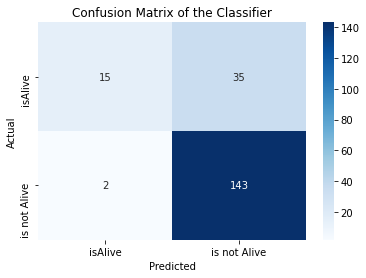

In [101]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['isAlive', 'is not Alive'])

**Area Under the AUC**

In [102]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.6431


**CART Model**

In [103]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [104]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.8738
Full Tree Testing ACCURACY : 0.8103
Full Tree AUC Score: 0.7217


In [105]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 27
False Positives: 23
False Negatives: 14
True Positives : 131



In [106]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 4,
                                     min_samples_leaf = 25,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

Training ACCURACY: 0.7955
Testing  ACCURACY: 0.8154
AUC Score        : 0.64


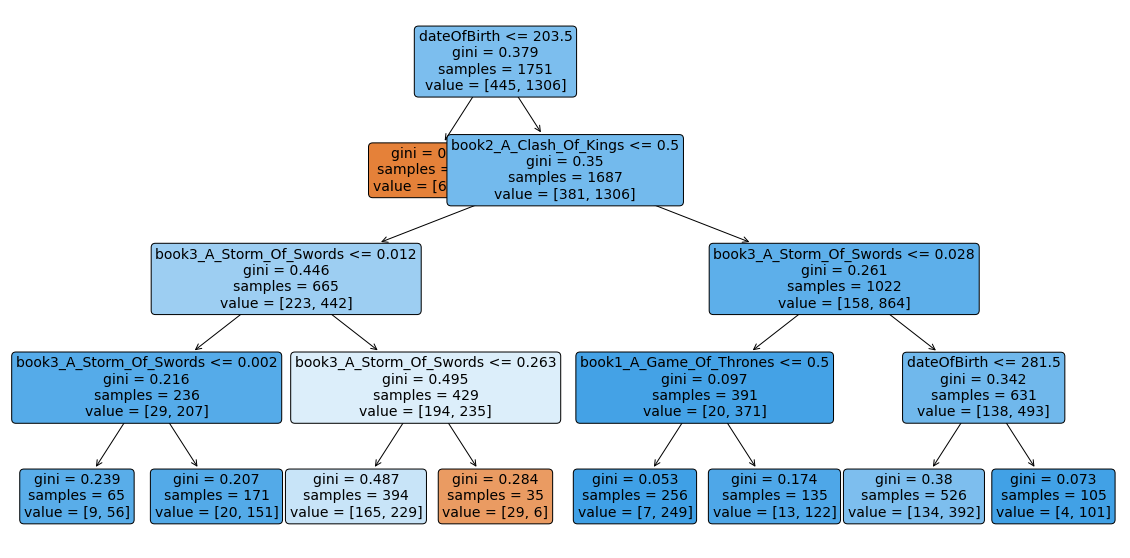

In [107]:
# setting figure size
plt.figure(figsize=(20, 10)) # adjusting to better fit the visual


# developing a plotted tree
plot_tree(decision_tree = pruned_tree_fit, # changing to pruned_tree_fit
          feature_names = GOT.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

In [108]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 4,
                                     min_samples_leaf = 25,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

Training ACCURACY: 0.7955
Testing  ACCURACY: 0.8154
AUC Score        : 0.64


In [109]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 14
False Positives: 36
False Negatives: 0
True Positives : 145



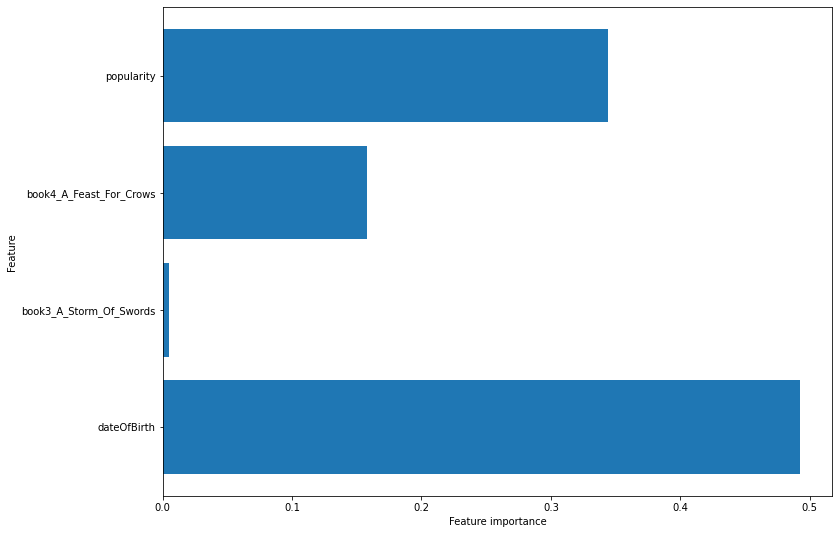

In [110]:
# plotting feature importance
plot_feature_importances(pruned_tree_fit,
                         train = x_train,
                         export = False)

**Comparing Results**

In [111]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}           {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)



Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.6431         (15, 35, 2, 143)
Full Tree     0.7217           (27, 23, 14, 131)
Pruned Tree   0.64         (14, 36, 0, 145)



**KNN Model Classification**

In [112]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):

    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1

In [113]:
# determining the optimal number of neighbors
#opt_neighbors = optimal_neighbors(x_data        = GOT_data,
#                                  y_data        = GOT_target,
#                                  response_type = 'class')

In [114]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(GOT_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(GOT_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            GOT_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = GOT_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = 19)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

Training ACCURACY: 0.7847
Testing  ACCURACY: 0.841
AUC Score        : 0.7359


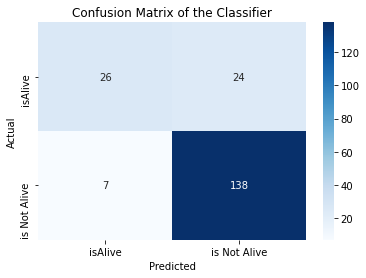

In [115]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = knn_pred,
          labels = ['isAlive', 'is Not Alive'])

In [116]:
# unpacking the confusion matrix
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 14
False Positives: 36
False Negatives: 0
True Positives : 145



**Hyperparameter Tuning**

In [117]:
# train/test split with the full model
GOT_data   =  GOT.loc[ : , candidate_dict['logit_sig']]
GOT_target =  GOT.loc[ : , 'isAlive']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            GOT_data,
            GOT_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = GOT_target )

**Logistic Regression with Deafault Hyperparameters**

In [118]:
# INSTANTIATING a logistic regression model with default values
lr_default = LogisticRegression(solver = 'lbfgs',
                                C = 1.0,
                                warm_start = False,
                                random_state = 219)

In [119]:
# FITTING the training data
lr_default_fit = lr_default.fit(x_train, y_train)


# PREDICTING based on the testing set
lr_default_pred = lr_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_default_fit.score(x_test, y_test).round(4))


# SCORING with AUC
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_default_pred).round(4))


# saving scoring data for future use
logreg_train_score = lr_default_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = lr_default_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC score
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = lr_default_pred).round(4)

Training ACCURACY: 0.7533
Testing  ACCURACY: 0.8103
AUC Score        : 0.6431


**Hyperparameter Tuning with RandomizedSearchCV**

In [120]:
########################################
# RandomizedSearchCV
########################################

# declaring a hyperparameter space
#C_range          = np.arange(0.1, 5.0, 0.1)
#warm_start_range = [True, False]
#solver_range     = ['newton-cg', 'sag', 'lbfgs']


# creating a hyperparameter grid
#param_grid = {'C'          : C_range,
              #'warm_start' : warm_start_range,
              #'solver'     : solver_range}


# INSTANTIATING the model object without hyperparameters
#lr_tuned = LogisticRegression(random_state = 219,
                             # max_iter     = 1000) # increased for convergence


# GridSearchCV object
#lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
#                                 param_distributions = param_grid, # parameters to tune
#                                cv                  = 3,          # how many folds in cross-validation
 #                                n_iter              = 250,        # number of combinations of hyperparameters to try
  #                               random_state        = 219,        # starting point for random sequence
   #                              scoring = make_scorer(
    #                                       roc_auc_score,
    #                                      needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
#lr_tuned_cv.fit(GOT_data, GOT_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Tuned Parameters  :", lr_tuned_cv.best_params_)
#print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

In [137]:
# checking the best estimator for the model
#lr_tuned_cv.best_estimator_

In [138]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = LogisticRegression(C            = 2.2,
                              warm_start   = True,
                              solver       = 'lbfgs',
                              max_iter     = 1000,
                              random_state = 219)


# FITTING the model to the full dataset
lr_tuned.fit(GOT_data, GOT_target) # this is ok because already tuned


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('LR Tuned Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('LR Tuned Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('LR Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

LR Tuned Training ACCURACY: 0.7504
LR Tuned Testing  ACCURACY: 0.7897
LR Tuned AUC Score        : 0.59


In [139]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 9
False Positives: 41
False Negatives: 0
True Positives : 145



In [140]:
# declaring model performance objects
lr_train_acc = lr_tuned.score(x_train, y_train).round(4)
lr_test_acc  = lr_tuned.score(x_test, y_test).round(4)
lr_auc       = roc_auc_score(y_true  = y_test,
                             y_score = lr_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned LR',
                           'Training Accuracy' : lr_train_acc,
                           'Testing Accuracy'  : lr_test_acc,
                           'AUC Score'         : lr_auc,
                           'Confusion Matrix'  : (lr_tuned_tn,
                                                  lr_tuned_fp,
                                                  lr_tuned_fn,
                                                  lr_tuned_tp)},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6431,0.7533,0.8103,"(15, 35, 2, 143)"
1,Full Tree,0.7217,0.8738,0.8103,"(27, 23, 14, 131)"
2,Pruned Tree,0.6400,0.7955,0.8154,"(14, 36, 0, 145)"
3,Tuned Random Forest (Full),0.7731,0.8172,0.8769,"(28, 22, 2, 143)"
4,GBM (Full),0.6862,0.8321,0.8256,"(20, 30, 4, 141)"
5,Tuned GBM,0.8631,0.8549,0.9231,"(37, 13, 2, 143)"
6,Tuned LR,0.5900,0.7504,0.7897,"(9, 41, 0, 145)"


**Hyperparameter Tuning on Classification Trees**

In [141]:
# declaring a hyperparameter space
criterion_range = ['gini', 'entropy']
splitter_range  = ['best', 'random']
depth_range     = np.arange(1, 25, 1)
leaf_range      = np.arange(1, 100, 1)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_range,
              'splitter'         : splitter_range,
              'max_depth'        : depth_range,
              'min_samples_leaf' : leaf_range}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 1000,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(GOT_data, GOT_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

Tuned Parameters  : {'splitter': 'best', 'min_samples_leaf': 12, 'max_depth': 20, 'criterion': 'entropy'}
Tuned Training AUC: 0.6841


In [142]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = DecisionTreeClassifier(splitter         = 'best',
                                    min_samples_leaf = 12,
                                    max_depth        = 8,
                                    criterion        = 'entropy',
                                    random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
tree_tuned_fit = tree_tuned.fit(GOT_data, GOT_target)


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                       y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.8138
Testing  ACCURACY: 0.8667
AUC Score        : 0.7793


In [143]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 30
False Positives: 20
False Negatives: 6
True Positives : 139



In [144]:
# declaring model performance objects
tree_train_acc = tree_tuned.score(x_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(x_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Final Model - Tuned Tree',
                           'Training Accuracy' : tree_train_acc,
                           'Testing Accuracy'  : tree_test_acc,
                           'AUC Score'         : tree_auc,
                           'Confusion Matrix'  : (tuned_tree_tn,
                                                  tuned_tree_fp,
                                                  tuned_tree_fn,
                                                  tuned_tree_tp)},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6431,0.7533,0.8103,"(15, 35, 2, 143)"
1,Full Tree,0.7217,0.8738,0.8103,"(27, 23, 14, 131)"
2,Pruned Tree,0.6400,0.7955,0.8154,"(14, 36, 0, 145)"
3,Tuned Random Forest (Full),0.7731,0.8172,0.8769,"(28, 22, 2, 143)"
4,GBM (Full),0.6862,0.8321,0.8256,"(20, 30, 4, 141)"
5,Tuned GBM,0.8631,0.8549,0.9231,"(37, 13, 2, 143)"
6,Tuned LR,0.5900,0.7504,0.7897,"(9, 41, 0, 145)"
7,Final Model - Tuned Tree,0.7793,0.8138,0.8667,"(30, 20, 6, 139)"


**Ensemble Modeling**

In [145]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('./analysis_images/Feature_Importance.png')

In [146]:
# train/test split with the logit_sig variables
GOT_data   =  GOT.loc[ : , candidate_dict['logit_sig']]
GOT_target =  GOT.loc[ : , 'isAlive']


# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            GOT_data ,
            GOT_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = GOT_target)

In [147]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [148]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.8738
Testing  ACCURACY: 0.8154
AUC Score        : 0.7186


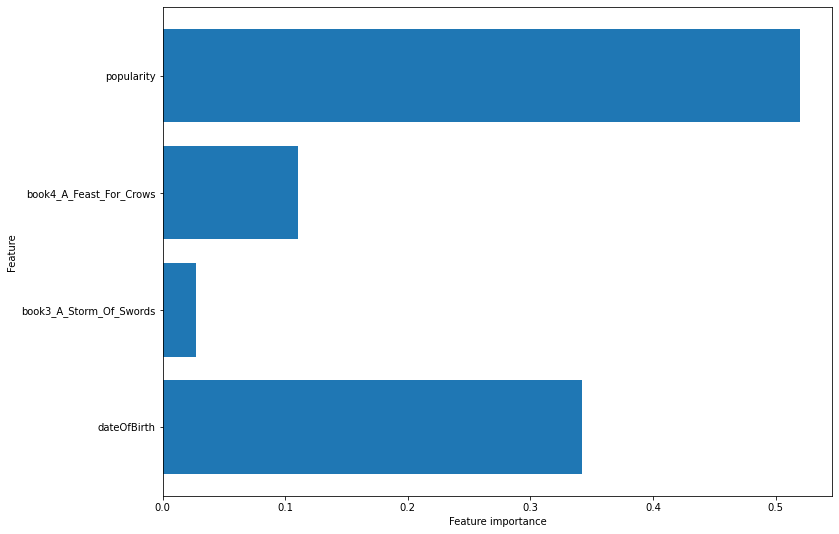

In [149]:
# plotting feature importances
plot_feature_importances(rf_default_fit,
                         train = x_train,
                         export = False)

In [150]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 26
False Positives: 24
False Negatives: 12
True Positives : 133



In [151]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (Full)',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6431,0.7533,0.8103,"(15, 35, 2, 143)"
1,Full Tree,0.7217,0.8738,0.8103,"(27, 23, 14, 131)"
2,Pruned Tree,0.6400,0.7955,0.8154,"(14, 36, 0, 145)"
3,Tuned Random Forest (Full),0.7731,0.8172,0.8769,"(28, 22, 2, 143)"
4,GBM (Full),0.6862,0.8321,0.8256,"(20, 30, 4, 141)"
5,Tuned GBM,0.8631,0.8549,0.9231,"(37, 13, 2, 143)"
6,Tuned LR,0.5900,0.7504,0.7897,"(9, 41, 0, 145)"
7,Final Model - Tuned Tree,0.7793,0.8138,0.8667,"(30, 20, 6, 139)"
8,Random Forest (Full),0.7186,0.8738,0.8154,"(26, 24, 12, 133)"


In [152]:
# FITTING the training data
#rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
#rf_default_fit_pred = rf_default_fit.predict(x_test)


# declaring a hyperparameter space
#estimator_range  = np.arange(100, 1100, 250)
#leaf_range       = np.arange(1, 31, 10)
#criterion_range  = ['gini', 'entropy']
#bootstrap_range  = [True, False]
#warm_start_range = [True, False]


# creating a hyperparameter grid
#param_grid = {'n_estimators'     : estimator_range,
              #'min_samples_leaf' : leaf_range,
              #'criterion'        : criterion_range,
              #'bootstrap'        : bootstrap_range,
              #'warm_start'       : warm_start_range}


# INSTANTIATING the model object without hyperparameters
#forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
#forest_cv = RandomizedSearchCV(estimator           = forest_grid,
                              # param_distributions = param_grid,
                               #cv         = 3,
                               #n_iter     = 1000,
                              # scoring    = make_scorer(roc_auc_score,
                                            #needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
#forest_cv.fit(GOT_data, GOT_target)

# printing the optimal parameters and best score
#print("Tuned Parameters  :", forest_cv.best_params_)
#print("Tuned Training AUC:", forest_cv.best_score_.round(4))

In [153]:
# best estimators based on RandomizedSearchCV
#forest_cv.best_estimator_

In [154]:
# building a model based on hyperparameter tuning results

# INSTANTIATING with best_estimator
forest_tuned = RandomForestClassifier(criterion        = 'entropy',
                                      min_samples_leaf = 11,
                                      n_estimators     = 350,
                                      warm_start       = True,
                                      bootstrap        = False,
                                      random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
forest_tuned_fit = forest_tuned.fit(GOT_data, GOT_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.8172
Forest Tuned Testing  ACCURACY: 0.8769
Forest Tuned AUC Score        : 0.7731


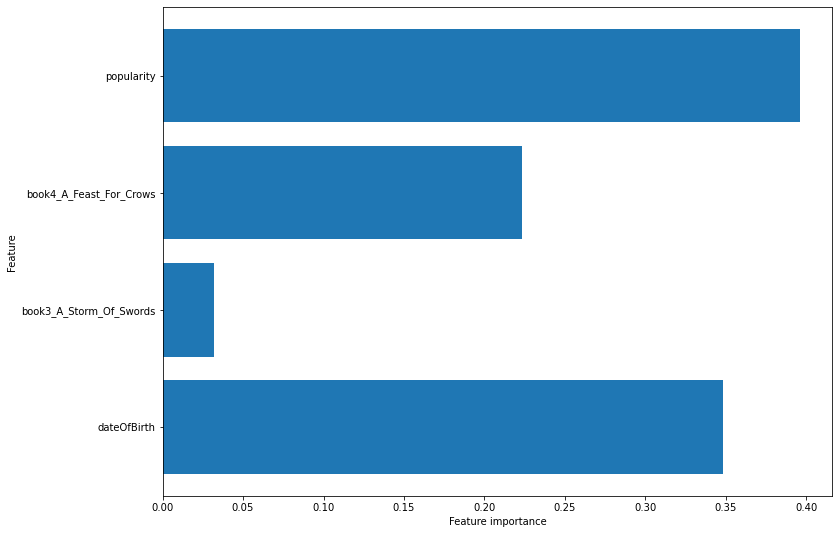

In [155]:
# plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = x_train,
                         export = False)

In [156]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 28
False Positives: 22
False Negatives: 2
True Positives : 143



In [157]:
# declaring model performance objects
tuned_rf_train_acc = forest_tuned_fit.score(x_train, y_train).round(4)
tuned_rf_test_acc  = forest_tuned_fit.score(x_test, y_test).round(4)
tuned_rf_auc       = roc_auc_score(y_true  = y_test,
                                   y_score = forest_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Tuned Random Forest (Full)',
                           'Training Accuracy'  : tuned_rf_train_acc,
                           'Testing Accuracy'   : tuned_rf_test_acc,
                           'AUC Score'          : tuned_rf_auc,
                           'Confusion Matrix'   : (tuned_rf_tn,
                                                   tuned_rf_fp,
                                                   tuned_rf_fn,
                                                   tuned_rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6431,0.7533,0.8103,"(15, 35, 2, 143)"
1,Full Tree,0.7217,0.8738,0.8103,"(27, 23, 14, 131)"
2,Pruned Tree,0.6400,0.7955,0.8154,"(14, 36, 0, 145)"
3,Tuned Random Forest (Full),0.7731,0.8172,0.8769,"(28, 22, 2, 143)"
4,GBM (Full),0.6862,0.8321,0.8256,"(20, 30, 4, 141)"
5,Tuned GBM,0.8631,0.8549,0.9231,"(37, 13, 2, 143)"
6,Tuned LR,0.5900,0.7504,0.7897,"(9, 41, 0, 145)"
7,Final Model - Tuned Tree,0.7793,0.8138,0.8667,"(30, 20, 6, 139)"
8,Random Forest (Full),0.7186,0.8738,0.8154,"(26, 24, 12, 133)"
9,Tuned Random Forest (Full),0.7731,0.8172,0.8769,"(28, 22, 2, 143)"


**Gradient Boosted Machines**

In [158]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.8321
Testing ACCURACY : 0.8256
AUC Score        : 0.6862


In [159]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 20
False Positives: 30
False Negatives: 4
True Positives : 141



In [160]:
# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6431,0.7533,0.8103,"(15, 35, 2, 143)"
1,Full Tree,0.7217,0.8738,0.8103,"(27, 23, 14, 131)"
2,Pruned Tree,0.6400,0.7955,0.8154,"(14, 36, 0, 145)"
3,Tuned Random Forest (Full),0.7731,0.8172,0.8769,"(28, 22, 2, 143)"
4,GBM (Full),0.6862,0.8321,0.8256,"(20, 30, 4, 141)"
5,Tuned GBM,0.8631,0.8549,0.9231,"(37, 13, 2, 143)"
6,Tuned LR,0.5900,0.7504,0.7897,"(9, 41, 0, 145)"
7,Final Model - Tuned Tree,0.7793,0.8138,0.8667,"(30, 20, 6, 139)"
8,Random Forest (Full),0.7186,0.8738,0.8154,"(26, 24, 12, 133)"
9,Tuned Random Forest (Full),0.7731,0.8172,0.8769,"(28, 22, 2, 143)"


In [161]:
# declaring a hyperparameter space
#learn_range        = np.arange(0.1, 2.2, 0.5)
#estimator_range    = np.arange(100, 501, 25)
#depth_range        = np.arange(2, 11, 2)
#warm_start_range   = [True, False]

# creating a hyperparameter grid
#param_grid = {'learning_rate' : learn_range,
              #'max_depth'     : depth_range,
              #'n_estimators'  : estimator_range,
              #'warm_start'    : warm_start_range}


# INSTANTIATING the model object without hyperparameters
#full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# GridSearchCV object
#full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
                          # param_distributions = param_grid,
                           #cv                  = 3,
                           #n_iter              = 500,
                           #random_state        = 219,
                           #scoring             = make_scorer(roc_auc_score,
                                                 #needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
#full_gbm_cv.fit(GOT_data, GOT_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Tuned Parameters  :", full_gbm_cv.best_params_)
#print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

In [162]:
# checking the best estimator for the model
#full_gbm_cv.best_estimator_

In [163]:
# INSTANTIATING with best_estimator
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.6,
                                       max_depth     = 2,
                                       n_estimators  = 425,
                                       warm_start    = False,
                                       random_state  = 219)


# FITTING to the FULL DATASET (due to cross-validation)
gbm_tuned_fit = gbm_tuned.fit(GOT_data, GOT_target)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

Training ACCURACY: 0.8549
Testing  ACCURACY: 0.9231
AUC Score        : 0.8631


In [164]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 37
False Positives: 13
False Negatives: 2
True Positives : 143



In [165]:
# declaring model performance objects
gbm_train_acc = gbm_tuned_fit.score(x_train, y_train).round(4)
gbm_test_acc  = gbm_tuned_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned GBM',
                          'Training Accuracy'  : gbm_train_acc,
                          'Testing Accuracy'   : gbm_test_acc,
                          'AUC Score'          : gbm_auc,
                          'Confusion Matrix'   : (gbm_tuned_tn,
                                                  gbm_tuned_fp,
                                                  gbm_tuned_fn,
                                                  gbm_tuned_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6431,0.7533,0.8103,"(15, 35, 2, 143)"
1,Full Tree,0.7217,0.8738,0.8103,"(27, 23, 14, 131)"
2,Pruned Tree,0.6400,0.7955,0.8154,"(14, 36, 0, 145)"
3,Tuned Random Forest (Full),0.7731,0.8172,0.8769,"(28, 22, 2, 143)"
4,GBM (Full),0.6862,0.8321,0.8256,"(20, 30, 4, 141)"
5,Tuned GBM,0.8631,0.8549,0.9231,"(37, 13, 2, 143)"
6,Tuned LR,0.5900,0.7504,0.7897,"(9, 41, 0, 145)"
7,Final Model - Tuned Tree,0.7793,0.8138,0.8667,"(30, 20, 6, 139)"
8,Random Forest (Full),0.7186,0.8738,0.8154,"(26, 24, 12, 133)"
9,Tuned Random Forest (Full),0.7731,0.8172,0.8769,"(28, 22, 2, 143)"


In [166]:
model_performance.sort_values(by = 'AUC Score',
                              ascending = False)

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
5,Tuned GBM,0.8631,0.8549,0.9231,"(37, 13, 2, 143)"
11,Tuned GBM,0.8631,0.8549,0.9231,"(37, 13, 2, 143)"
7,Final Model - Tuned Tree,0.7793,0.8138,0.8667,"(30, 20, 6, 139)"
3,Tuned Random Forest (Full),0.7731,0.8172,0.8769,"(28, 22, 2, 143)"
9,Tuned Random Forest (Full),0.7731,0.8172,0.8769,"(28, 22, 2, 143)"
1,Full Tree,0.7217,0.8738,0.8103,"(27, 23, 14, 131)"
8,Random Forest (Full),0.7186,0.8738,0.8154,"(26, 24, 12, 133)"
4,GBM (Full),0.6862,0.8321,0.8256,"(20, 30, 4, 141)"
10,GBM (Full),0.6862,0.8321,0.8256,"(20, 30, 4, 141)"
0,Logistic,0.6431,0.7533,0.8103,"(15, 35, 2, 143)"


In [167]:
def print_conf_matrix(tn, fp, fn, tp):
    """
Displays a customised confusion matrix.

PARAMETERS
----------
tn : correctly predicted false values for the response variable.
fp : incorrectly predicted true values for the response variable.
fn : incorrectly predicted false values for the response variable.
tp : correctly predicted true values for the response variable.
"""
    # printing custom confussion matrix

    print(f"""
                                                 |
  True Negatives:          {tn}                    |  False Positives:         {fp}                   
                                                 |
  PREDICTED: Dead         (isAlive=0)            |  PREDICTED: Alive        (isAlive=1)
  ACTUAL:    Dead         (isAlive=0)            |  ACTUAL:    Dead         (isAlive=0)
                                                 |
-------------------------------------------------|-----------------------------------------------
                                                 |
  False Negatives:           {fn}                   |  True Positives:         {tp}
                                                 |  
  PREDICTED: Dead         (isAlive=0)            |  PREDICTED: Dead         (isAlive=0)
  ACTUAL:    Alive        (isAlive=1)            |  ACTUAL:    Alive        (isAlive=1)
                                                 |  
    """)

print_conf_matrix(tuned_tree_tn, tuned_tree_fp, tuned_tree_fn, tuned_tree_tp)




                                                 |
  True Negatives:          30                    |  False Positives:         20                   
                                                 |
  PREDICTED: Dead         (isAlive=0)            |  PREDICTED: Alive        (isAlive=1)
  ACTUAL:    Dead         (isAlive=0)            |  ACTUAL:    Dead         (isAlive=0)
                                                 |
-------------------------------------------------|-----------------------------------------------
                                                 |
  False Negatives:           6                   |  True Positives:         139
                                                 |  
  PREDICTED: Dead         (isAlive=0)            |  PREDICTED: Dead         (isAlive=0)
  ACTUAL:    Alive        (isAlive=1)            |  ACTUAL:    Alive        (isAlive=1)
                                                 |  
    


**The best model is the Tuned Tree model with the AUC of and a test_train_gap of 0.0529**